<h2>NN Model, 1 input, 1 output, model complex function?</h2>

In [1]:
%matplotlib inline

In [2]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import logistic
from matplotlib import gridspec

In [127]:
# The true function
def true_function(x):
    return [1, 3, 1, 3, 1, 3][x]

def act(x):
    #return logistic.cdf(x)
    return x * (x>0)

def actp(x):
    #return logistic._pdf(x)
    return S

In [128]:
# NN model
IN = 1
HIDDEN = 6
OUT = 1

W1 = np.random.random_sample((HIDDEN, 1))
b1 = np.random.random_sample((HIDDEN, 1))

W2 = np.random.random_sample((1, HIDDEN))

def run(x, t=None, alpha=0.01):
    global W1, b1, W2
    
    z1 = W1.dot(x) + b1 # HIDDEN x 1
    h1 = act(z1)
    
    y = W2.dot(h1)
    
    if t is not None:
        # Train
        delta_y = y - t # OUT x OUT
        gW2 = np.multiply(delta_y, h1.T)
        
        delta_h1 = delta_y.dot(W2).T
        delta_z1 = np.multiply(delta_h1, actp(z1))
        
        gW1 = np.multiply(delta_z1, x)
        gb1 = delta_z1
        
        W1 -= alpha * gW1
        W2 -= alpha * gW2
        b1 -= alpha * gb1
    
    return y

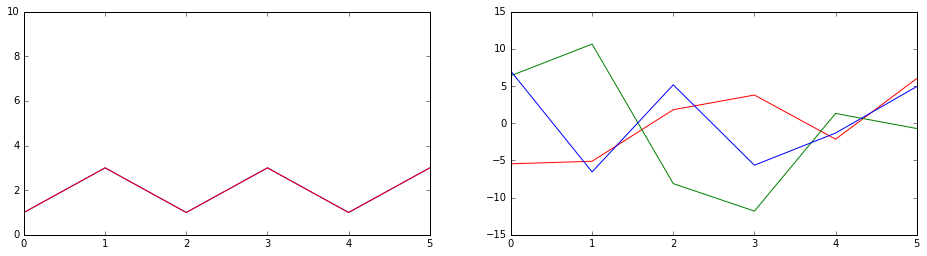

In [142]:
for i in xrange(10000):
    # Get a random pair
    data_x = np.random.randint(6)
    data_t = true_function(data_x)
    
    y = run([[data_x]], t=[[data_t]], alpha=0.05)
    #y = run(x=[[1]], t=[[4]], alpha=0.1)
    
# Evaluate the model
tys = []
mys = []
for data_x in range(6):
    true_y = true_function(data_x)
    model_y = run(x=[[data_x]])[0][0]
    tys.append(true_y)
    mys.append(model_y)

    
gs = gridspec.GridSpec(1, 2)

plt.figure(figsize=(16,4))

plt.subplot(gs[0])
plt.axis([0, 5, 0, 10])
f = plt.plot(range(6), tys, c='b')
plt.plot(range(6), mys, c='r')

plt.subplot(gs[1])
plt.plot(W1, c='r')
plt.plot(b1, c='g')
plt.plot(W2.T, c='b')